최선의 모형 선택
===
## 1. 데이터의 확인과 실행

## 2. 모델 업데이트하기
## 3. 그래프로 확인하기
## 4. 학습의 자동 중단

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# 자동완성
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

df_pre_red = pd.read_csv("./csv_data/winequality-red.csv", sep=";")
df_pre_white = pd.read_csv("./csv_data/winequality-white.csv", sep=";")

print(df_pre_red.shape, df_pre_white.shape, sep=" ")
df_pre_red.head()

(1599, 12) (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df_pre_red["label"] = 0
df_pre_white["label"] = 1

df = pd.concat([df_pre_red, df_pre_white], ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [3]:
dataset = df.values
X = dataset[:,0:12]
y = dataset[:, 12]

In [4]:
# 모형의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 모델 컴파일
model.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

# 모델 저장 폴더 설정
Model_Dir = "./model/"
if not os.path.exists(Model_Dir) :
    os.mkdir(Model_Dir)

# 모델 저장 조건 설정
modelpath = "./model/{epoch:02d}_{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
earlystop = EarlyStopping(monitor="val_loss", patience=100)

# 모델 실행 및 저장
history = model.fit(X, y, validation_split=0.33, epochs=3500, batch_size=500,
                    callbacks=[earlystop, checkpointer])

history.history.keys()

Epoch 1/3500
1/9 [==>...........................] - ETA: 2s - loss: 11.6927 - accuracy: 0.3560
Epoch 1: val_loss improved from inf to 0.35769, saving model to ./model\01_0.3577.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 6.0698 - accuracy: 0.3748 - val_loss: 0.3577 - val_accuracy: 0.8634
Epoch 2/3500
1/9 [==>...........................] - ETA: 0s - loss: 0.4696 - accuracy: 0.7800
Epoch 2: val_loss improved from 0.35769 to 0.00324, saving model to ./model\02_0.0032.hdf5
9/9 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.7346 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 3/3500
1/9 [==>...........................] - ETA: 0s - loss: 0.9525 - accuracy: 0.6980
Epoch 3: val_loss did not improve from 0.00324
9/9 [==============================] - 0s 3ms/step - loss: 1.1045 - accuracy: 0.6870 - val_loss: 0.0036 - val_accuracy: 0.9991
Epoch 4/3500
1/9 [==>...........................] - ETA: 0s - loss: 1.1578 - accuracy: 0.7140
Epoch 4: val_los

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

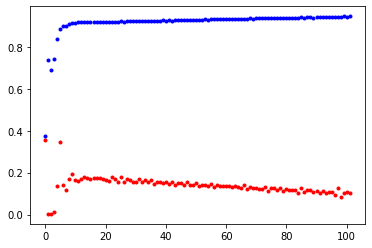

In [5]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history["val_loss"]

# y_acc에 학습 셋으로 측정한 정확도의 값을 저장
y_acc = history.history["accuracy"]

# x값을 지정하고, 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()